In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [ ]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

In [9]:
df.index.month_name().unique()

Index(['May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'January', 'February', 'March', 'April'],
      dtype='object', name='date')

[Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')]

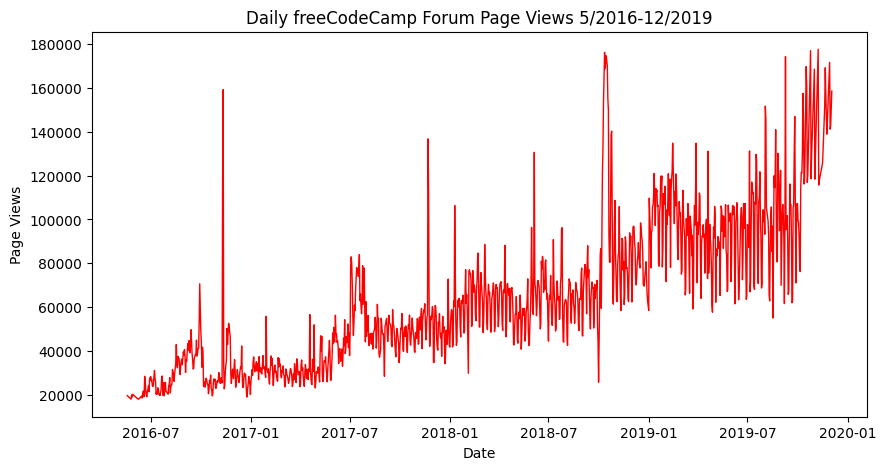

In [4]:
# Draw line plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['value'], 'r', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set(title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [5]:
# Copy and modify data for monthly bar plot
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()

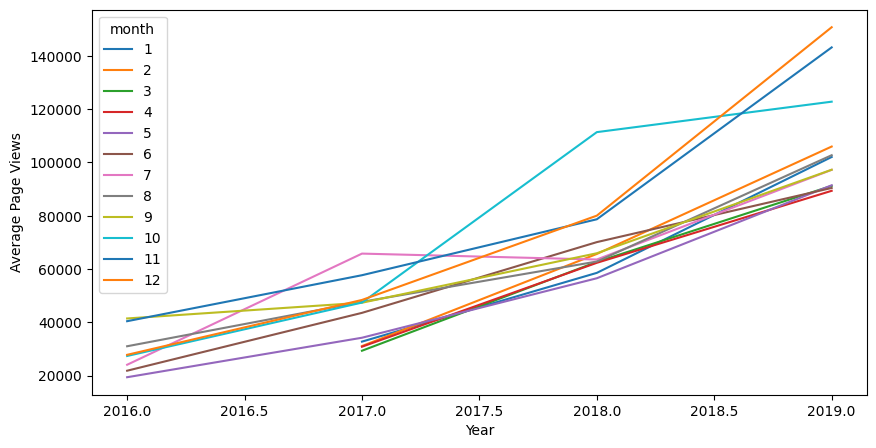

In [6]:
fig = df_bar.plot(legend = True, figsize = (10,5), ylabel="Average Page Views", xlabel = 'Year', rot = 0).figure
plt.legend(['January'])